In [1]:
import networkx as nx
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

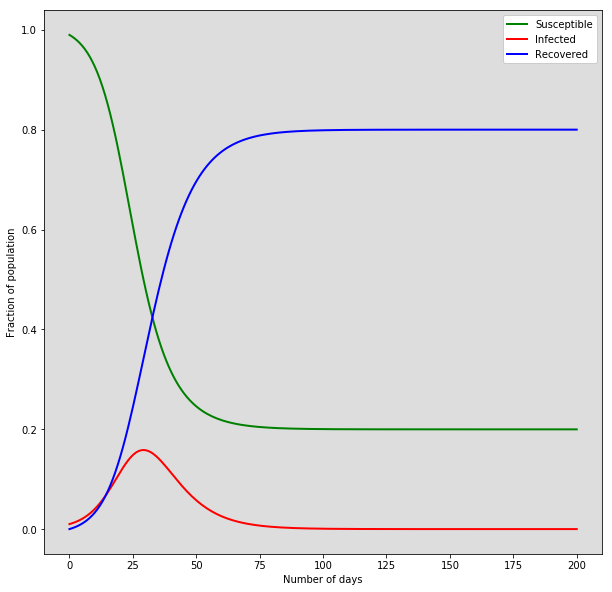

In [2]:
#Building the network free S-I-R Model
def sir_model(z,t,beta,gamma):
    s,i,r=z
    dsdt=-beta*s*i
    didt=beta*s*i-gamma*i
    drdt=gamma*i
    return [dsdt,didt,drdt]
#initial condition
i0=1.0/100   #starting with single infection in a population of 100
r0=0
s0=1-i0-r0
z0=[s0,i0,r0]

t=np.linspace(0,200,200)
sol=scipy.integrate.odeint(sir_model,z0,t,args=(0.3,0.15))

fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,facecolor='#DDDDDD')
ax.plot(t,sol[0:,0],'g',lw=2,label='Susceptible')
ax.plot(t,sol[0:,1],'r',lw=2,label='Infected')
ax.plot(t,sol[0:,2],'b',lw=2,label='Recovered')
ax.set_xlabel('Number of days')
ax.set_ylabel('Fraction of population')
legend=ax.legend()   #legend object has to be created to observe the labels
legend.get_frame().set_alpha(1)  #setting the opacity of the legend frame
plt.show()

In [3]:
#on network simulation of S-I-R model
import EoN as eon

We are using codes from the paper **EoN(Epidemics on network): a fast, flexible python package for simulation, analytic approximation, and analysis of epidemics on networks by Joel C. Miller  Tony Ting**

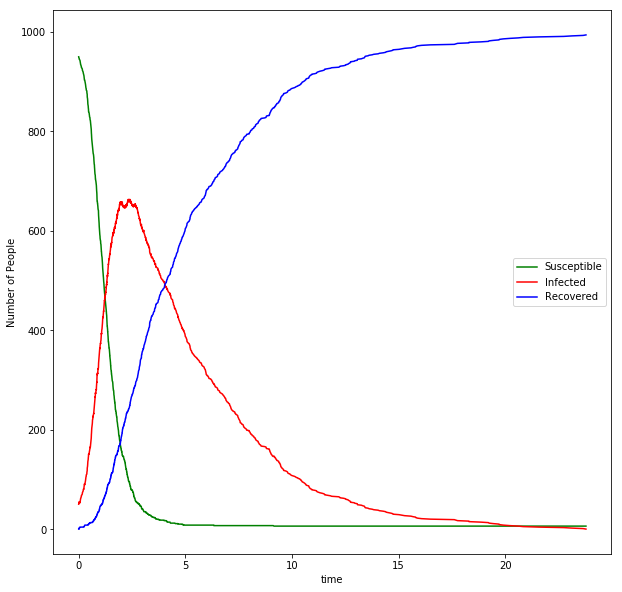

In [4]:
#testing a example from the paper AN SIR simulation on Erdos-Renye network
N=10**3  #number of nodes/individuals
kavg=10 #avg degree
G=nx.fast_gnp_random_graph(N,kavg/(N-1)) #creating the erdos-renye network
i0=0.05 #initial infection
beta=0.3 #transmission rate
gamma=0.25 #recovery rate

#the magic part
t,S,I,R=eon.fast_SIR(G,beta,gamma,rho=i0)
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
ax.plot(t,S,'g',lw=1.5,label='Susceptible')
ax.plot(t,I,'r',label='Infected')
ax.plot(t,R,'b',label='Recovered')
ax.set_xlabel('time')
ax.set_ylabel('Number of People')
legend=ax.legend()
plt.show()

**Modelling two infections non interacting SIR model**

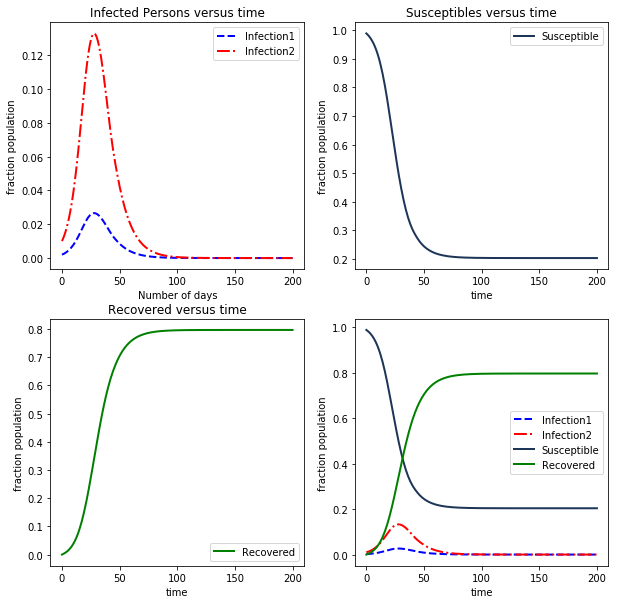

In [59]:
def sir_model_variation(t,z,betaA,betaB,gamma):
    s,iA,iB,r=z
    dsdt=-betaA*s*iA-betaB*s*iB          #population is susceptible to both infections 
    diAdt=betaA*iA*s-gamma*iA          #rate of growth of infection1 taking into account recovery
    diBdt=betaA*iB*s-gamma*iB      #rate of growth of infection2 taking into account recovery
    drdt=gamma*(iA+iB)
    return [dsdt,diAdt,diBdt,drdt]

#########initial conditions and parameters##############
i10=1.0/500     #initial condition for infection1
i20=5.0/500   #initial condition for infection2
r0=0
s0=1-i10-i20-r0
z0=[s0,i10,i20,r0]

tSpan=np.linspace(0,200,200)


sol=scipy.integrate.solve_ivp(sir_model_variation,[tSpan[0],tSpan[-1]],z0,t_eval=tSpan,args=(0.3,0.3,0.15))



fig=plt.figure(figsize=(10,10))
axes=fig.subplots(nrows=2,ncols=2)


########## for infected plot ##############

axes[0,0].plot(t,sol.y[1],'b--',lw=2,label='Infection1')
axes[0,0].plot(t,sol.y[2],'r-.',lw=2,label='Infection2')
axes[0,0].set_xlabel('Number of days')
axes[0,0].set_ylabel('fraction population')
axes[0,0].set(title='Infected Persons versus time')
legend=axes[0,0].legend()

########## for susceptible plot ##########

axes[0,1].plot(t,sol.y[0],'#1D3557',lw=2,label='Susceptible')
axes[0,1].set_xlabel('time')
axes[0,1].set_ylabel('fraction population')
axes[0,1].set(title='Susceptibles versus time')
legend=axes[0,1].legend()

###### for recovered plot ###############

axes[1,0].plot(t,sol.y[3],'g',lw=2,label='Recovered')
axes[1,0].set_xlabel('time')
axes[1,0].set_ylabel('fraction population')
axes[1,0].set(title='Recovered versus time')
legend=axes[1,0].legend()

########## all plots together ##########

axes[1,1].plot(t,sol.y[1],'b--',lw=2,label='Infection1')
axes[1,1].plot(t,sol.y[2],'r-.',lw=2,label='Infection2')
axes[1,1].plot(t,sol.y[0],'#1D3557',lw=2,label='Susceptible')
axes[1,1].plot(t,sol.y[3],'g',lw=2,label='Recovered')
axes[1,1].set_xlabel('time')
axes[1,1].set_ylabel('fraction population')
legend=axes[1,1].legend()


plt.show()
    